In [34]:
import tensorflow as tf
import numpy as np
from random import randint

In [49]:
# celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
# fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

celsius = []
fahrenheit = []

for _ in range(200):
  celsius.append(randint(-100, 100))
  fahrenheit.append(celsius[-1] * 1.8 + 32)

In [53]:
# capa = tf.keras.layers.Dense(units=1, input_shape=[1])
# modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1]) 
oculta2 = tf.keras.layers.Dense(units=3) 
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [54]:
modelo.compile(
  optimizer=tf.keras.optimizers.Adam(0.1),
  loss='mean_squared_error'
)

In [55]:
print('Comenzar entrenamiento...')
historial = modelo.fit(celsius, fahrenheit, epochs=500, verbose=False)
print('Modelo entrenado!')

Comenzar entrenamiento...
Modelo entrenado!


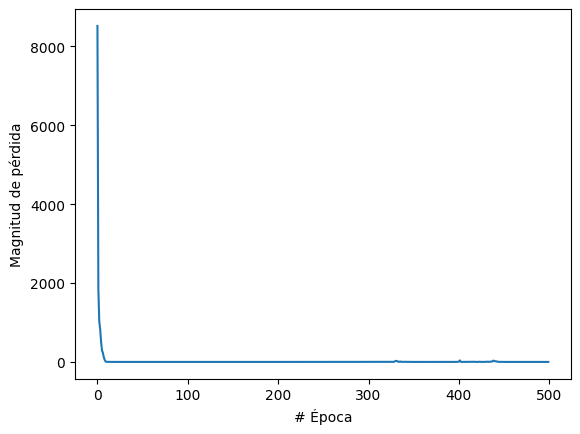

In [56]:
import matplotlib.pyplot as plt
plt.xlabel('# Época')
plt.ylabel('Magnitud de pérdida')
plt.plot(historial.history['loss'])

In [58]:
print('Prueba de predicción!')
resultado = modelo.predict([100.0], verbose=False)
print(f'El resultado es {resultado} fahrenheit!')

Prueba de predicción!
El resultado es [[212.05461]] fahrenheit!


In [22]:
print('Variables internas del modelo')
# print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[1.0397077 , 0.01172924, 0.02811503]], dtype=float32), array([ 8.705809  , -2.4330966 ,  0.12418553], dtype=float32)]
[array([[ 0.02411629,  1.5232197 , -0.13460347],
       [-1.4099265 ,  0.00242137, -0.15708573],
       [-0.7644485 , -0.00668693,  1.1912515 ]], dtype=float32), array([-5.6394563,  8.736899 ,  6.6041036], dtype=float32)]
[array([[ 0.00837321],
       [ 1.1357521 ],
       [-0.0147416 ]], dtype=float32), array([7.1290717], dtype=float32)]
